## Data Preprocessing for Tableau Dashboard Project -- Lin Han

### 1. Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style of plot
plt.style.use('ggplot')

### 2. Load and clean Construction Capital Budget dataset (change column name, missing values, variable type)

In [2]:
# Load Capital Budget excel dataset (sheet 1) from local folder
df = pd.read_excel('C:/Users/han_l/Desktop/Tableau_Project/Capital_Budget_2015_to_2024_by_ward.xlsx',sheet_name='Sheet1')

# Check first 5 rows of dataframe 'df'
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,compcode,(Multiple Items),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Values,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Row Labels,Ward/Project Number,Project Name,Sub-Project Name,type,projnum,descript,projlocation,2015,2016.0,...,2020.0,2021.0,2022.0,2023.0,2024.0,2015-2024,Sum of priority,Sum of dept,Sum of program,Sum of code
4,1,Etobicoke North-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Set new column names 
new_header = df.iloc[3]
df.columns = new_header

# Rename several column names because data type is not string 
df=df.rename(columns = {2016.0:'2016', 2017.0:'2017', 2018.0:'2018', 2019.0:'2019', 2020.0:'2020', 2021.0:'2021', 
                        2022.0:'2022', 2023.0:'2023', 2024.0:'2024'})

# Format the column names to lowercase and remove blanks and other punctuations to underline
df.columns = df.columns.str.strip().str.lower().str.replace('[ /-]', '_')

In [4]:
df.shape

(12683, 24)

In [5]:
df.columns

Index(['row_labels', 'ward_project_number', 'project_name', 'sub_project_name',
       'type', 'projnum', 'descript', 'projlocation', '2015', '2016', '2017',
       '2018', '2019', '2015_2019', '2020', '2021', '2022', '2023', '2024',
       '2015_2024', 'sum_of_priority', 'sum_of_dept', 'sum_of_program',
       'sum_of_code'],
      dtype='object', name=3)

In [6]:
df.index

RangeIndex(start=0, stop=12683, step=1)

In [7]:
# Count the sum of NaN values in 'ward_project_number' column
df['ward_project_number'].isna().sum() 

8395

In [8]:
# Delete first 3 useless empty rows at index position 0 & 1 & 2
df = df.drop(df.index[0:4])

# Drop useless empty rows in the dataframe and reset the index
df = df.dropna(subset=['ward_project_number','2015'])
df = df.reset_index(drop=True)

# Drop not meaningful columns: 'projnum' because the information is contained in 'ward_project_number'
df = df.drop(columns=['row_labels', 'projnum'])

In [9]:
# Check if duplicate rows exist based on unique 'ward_project_number' column
df_duplicate = df[df.duplicated(['ward_project_number'])]
print(df_duplicate)

Empty DataFrame
Columns: [ward_project_number, project_name, sub_project_name, type, descript, projlocation, 2015, 2016, 2017, 2018, 2019, 2015_2019, 2020, 2021, 2022, 2023, 2024, 2015_2024, sum_of_priority, sum_of_dept, sum_of_program, sum_of_code]
Index: []

[0 rows x 22 columns]


In [10]:
# Check df shape and other information
df.shape

(4241, 22)

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4241 entries, 0 to 4240
Data columns (total 22 columns):
ward_project_number    4241 non-null object
project_name           4196 non-null object
sub_project_name       4196 non-null object
type                   4196 non-null object
descript               4193 non-null object
projlocation           3543 non-null object
2015                   4241 non-null object
2016                   4241 non-null float64
2017                   4241 non-null float64
2018                   4241 non-null float64
2019                   4241 non-null float64
2015_2019              4241 non-null object
2020                   4241 non-null float64
2021                   4241 non-null float64
2022                   4241 non-null float64
2023                   4241 non-null float64
2024                   4241 non-null float64
2015_2024              4241 non-null object
sum_of_priority        4241 non-null object
sum_of_dept            4241 non-null object
sum_

In [12]:
# Correct data type of 7 columns from object to float64
df['2015'] = df['2015'].astype('float64')
df['2015_2019'] = df['2015_2019'].astype('float64')
df['2015_2024'] = df['2015_2024'].astype('float64') 
df['sum_of_priority'] = df['sum_of_priority'].astype('float64') 
df['sum_of_dept'] = df['sum_of_dept'].astype('float64') 
df['sum_of_program'] = df['sum_of_program'].astype('float64') 
df['sum_of_code'] = df['sum_of_code'].astype('float64') 

# Add new calculated column '2020_2024' 
df['2020_2024'] = df['2015_2024']-df['2015_2019'] 

In [13]:
df.head()

3,ward_project_number,project_name,sub_project_name,type,descript,projlocation,2015,2016,2017,2018,...,2021,2022,2023,2024,2015_2024,sum_of_priority,sum_of_dept,sum_of_program,sum_of_code,2020_2024
0,ACH000010-56,Cultural Infrastructure Development,Franklin Carmichael Art Centre Expansion - FY,C,"Citizen Centred Services ""A""",(blank),0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,320.0,10.0,30.0,10.0,0.0
1,ACH000016-58,Major Maintenance,Franklin Carmichael - FY,B,"Citizen Centred Services ""A""",(blank),0.0,149.0,149.0,0.0,...,0.0,0.0,0.0,0.0,398.0,470.0,10.0,30.0,10.0,100.0
2,FAC906394-204,Structural/Building Envelope,"1535 ALBION-Rpl Pavement,Window, Paints",B,Internal Services,1535 ALBION RD Site,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30.0,5000.0,30.0,80.0,30.0,26.0
3,FAC906396-138,Sitework,1535 Albion Road - Various Projects,B,Internal Services,1535 Albion Road,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,5.0,5000.0,30.0,80.0,30.0,5.0
4,FAC906396-145,Sitework,1549 Albion-Asphalt Pavement Replacement,C,Internal Services,1549 ALBION RD Site,15.0,333.0,0.0,0.0,...,0.0,0.0,0.0,0.0,348.0,780.0,30.0,80.0,30.0,0.0


### 3. Clean 'project name' & 'project location' columns (replace punctuations & street elements)

In [14]:
# Create 'df_new' as a copy of 'df'
df_new = df.copy()

# Clean 'projlocation' column in 'df_new' and format address to lower case and remove blanks and punctuations 
df_new['new_location'] = df_new.projlocation.str.strip().str.lower().str.replace(' ', '_').str.replace('[.-/=,&:()]','').\
                         str.replace('-','_').str.replace('__','_').str.replace('_-_','_')

# Standardize common street elements and suffixes
df_new['new_location'] = df_new.new_location.str.replace('street','st').str.replace('avenue','ave').str.replace('building','bldg').\
                         str.replace('buildings','bldgs').str.replace('apt','').str.replace('pobox', '').str.replace('road', 'rd').\
                         str.replace('drive','dr').str.replace('_site','').str.replace('_the_','_').str.replace('blank', 'Unknown').\
                         str.replace('_rd','').str.replace('_st','').str.replace('_ave','')

In [15]:
# Clean 'project_name' column in 'df_new' and format address to lower case and remove blanks and punctuations
df_new['new_project_name'] = df_new.project_name.str.strip().str.capitalize().str.replace(' ', '_').\
                             str.replace('[.-/=,&:()]','').str.replace('__','_').str.replace('_-_','_')

In [16]:
# Clean 'descript' column in 'df_new' and format lower case and remove blanks
df_new['new_descript'] = df_new.descript.str.strip().str.capitalize().str.replace(' ', '_').str.replace('"','').str.replace('__','_')

In [17]:
# Clean 'sub_project_name' column in 'df_new' and format address to lower case and remove blanks and punctuations
df_new['new_sub_project_name'] = df_new.sub_project_name.str.strip().str.capitalize().str.replace(' ', '_').\
                                 str.replace('[.-/=,&:()]','').str.replace('_-_','_').str.replace('__','_')

In [18]:
# Drop useless columns and NAN missing values
df_new = df_new.drop(columns=['project_name', 'projlocation', 'descript','sub_project_name'])
df_new = df_new.dropna()

In [19]:
df_new.head()

3,ward_project_number,type,2015,2016,2017,2018,2019,2015_2019,2020,2021,...,2015_2024,sum_of_priority,sum_of_dept,sum_of_program,sum_of_code,2020_2024,new_location,new_project_name,new_descript,new_sub_project_name
0,ACH000010-56,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,320.0,10.0,30.0,10.0,0.0,Unknown,Cultural_infrastructure_development,Citizen_centred_services_a,Franklin_carmichael_art_centre_expansion_fy
1,ACH000016-58,B,0.0,149.0,149.0,0.0,0.0,298.0,100.0,0.0,...,398.0,470.0,10.0,30.0,10.0,100.0,Unknown,Major_maintenance,Citizen_centred_services_a,Franklin_carmichael_fy
2,FAC906394-204,B,0.0,0.0,0.0,0.0,4.0,4.0,26.0,0.0,...,30.0,5000.0,30.0,80.0,30.0,26.0,1535_albion,Structuralbuilding_envelope,Internal_services,1535_albion-rpl_pavementwindow_paints
3,FAC906396-138,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5000.0,30.0,80.0,30.0,5.0,1535_albion,Sitework,Internal_services,1535_albion_road_various_projects
4,FAC906396-145,C,15.0,333.0,0.0,0.0,0.0,348.0,0.0,0.0,...,348.0,780.0,30.0,80.0,30.0,0.0,1549_albion,Sitework,Internal_services,1549_albion-asphalt_pavement_replacement


In [20]:
# Check unique values in 3 categorical columns that will be used to build Dashboard later
df_new['new_location'].unique()

array(['Unknown', '1535_albion', '1549_albion', '1515_albion',
       '150_disco', '947_martin_grove', '2_civic_centre_court',
       '390_west_mall', '399_west_mall', '666_renforth_dr',
       '555_martin_grove', '320_bering', '330_bering', '146_east_mall',
       '308_prince_edward_dr', '4219_dundas_w', '259_horner',
       '799_islington', '3_lunness', '3111_lake_shore_w', '185_fifth',
       '47ation', '61_toryork_dr', '49_toryork_dr', '2753_jane',
       '277_victoria', '4330_dufferin',
       'at_1026_finch_w_finch_works_yard', '1026_finch_w', '4330_duffrin',
       '1300_sheppard_w', '4330_duffrein', '4330_dufferin_100_turnberry',
       '1300_wilson', '20_beffort', '1009_sheppard_w', '5700_bathurst',
       '578_finch_w', 'metro_hall', '662_jane', '2015_lawrence_w',
       '1123_weston', '2_king', '2050_jane', '2696_eglinton_w',
       '2696_eglinton', '1652_keele', '200_trethewey', '2700_eglinton_w',
       '95_lavinia', '462_runnymede', '9_clendenan', '590_jane',
       '1288

In [21]:
df_new['new_project_name'].unique()

array(['Cultural_infrastructure_development', 'Major_maintenance',
       'Structuralbuilding_envelope', 'Sitework', 'Renovations',
       'Albion_district_library_renovation', 'Playgroundswaterplay',
       'Waterfront_valley_erosion_control',
       'Black_creek_pioneer_village_retrofit', 'Demand_response_program',
       'Re-roofing', 'Mechanical_and_electrical',
       'Station_a_stn_414-hwy_27_and_rexdale_blvd',
       'Kipling_acres_redevelopment', 'Community_centres',
       'Park_development', 'Special_facilities', 'Cycling_infrastructure',
       'Service_enhancement',
       'Restorationpreservation_of_heritage_elements',
       'Refurbishment_and_rehabilitation', 'Trails_pathways',
       'Mimico_trails_construction', 'Sherway_trail_construction',
       'Critical_erosion_#2_water_funded_enhancements',
       'Six_points_interchange_redevelopment', 'Station_refurbishments',
       'Mimic_by_the_lake_bia', 'Mimico_renovation', 'Land_acquisition',
       'Arena', '2300_lakesho

In [24]:
df_new['new_descript'].unique()

array(['Citizen_centred_services_a', 'Internal_services', 'Agencies',
       'Other_city_programs', 'Citizen_centred_services_b',
       'Rate_supported_programs', 'Toronto_transit_commission'],
      dtype=object)

In [23]:
# Diagnose continuous varibles data: there are negative budget and many 0 budget for some planned budget years
# I assume nagetive budgets means fiscal deficit, there are complex reasons behind, and my dashboard will more focused on positive budget
df_new.describe()

3,2015,2016,2017,2018,2019,2015_2019,2020,2021,2022,2023,2024,2015_2024,sum_of_priority,sum_of_dept,sum_of_program,sum_of_code,2020_2024
count,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3.538000e+03,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3.538000e+03,3538.000000,3538.000000,3538.000000,3538.000000,3.538000e+03
mean,624.000218,893.588581,719.500260,697.877764,774.360141,3.709327e+03,652.609047,568.435721,502.176880,428.928513,387.075741,6.248553e+03,686.738270,33.448276,156.181458,33.448276,2.539226e+03
std,5358.845611,9174.305322,5395.438348,6300.051968,13316.177555,3.021898e+04,12346.922485,10803.808677,8471.854592,4877.139159,3653.234015,6.379753e+04,1636.043135,18.233641,121.240072,18.233641,3.761073e+04
min,-52650.000000,-61765.000000,-24350.000000,-15400.000000,-18461.000000,-6.887000e+04,-29683.000000,-1088.000000,-26112.000000,-907.000000,0.000000,-7.927900e+04,0.000000,10.000000,10.000000,10.000000,-5.579500e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,20.000000,60.000000,20.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02,10.000000,30.000000,100.000000,30.000000,0.000000e+00
75%,100.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.383250e+03,90.000000,50.000000,220.000000,50.000000,3.500000e+01
max,174045.000000,445830.000000,167550.000000,252162.000000,741903.000000,1.283437e+06,697403.000000,605395.000000,451992.000000,207773.000000,106040.000000,3.277000e+06,5000.000000,70.000000,620.000000,70.000000,1.993563e+06


### 4. Construction Capital budget for different areas in Toronto (change data structure)

In [25]:
# Creat a new 'df_total' dataframe that only contains total project budgets in an area for dashboard building
df_total = df[df['ward_project_number'].str.contains("Total")]
df_total = df_total.reset_index(drop=True)
df_total.head()

3,ward_project_number,project_name,sub_project_name,type,descript,projlocation,2015,2016,2017,2018,...,2021,2022,2023,2024,2015_2024,sum_of_priority,sum_of_dept,sum_of_program,sum_of_code,2020_2024
0,Etobicoke North-01 Total,NaN,NaN,NaN,NaN,NaN,2830.0,6801.0,6648.0,0.0,...,350.0,350.0,350.0,355.0,18164.0,17960.0,380.0,570.0,380.0,1881.0
1,Etobicoke North-02 Total,NaN,NaN,NaN,NaN,NaN,246.0,2200.0,4438.0,213.0,...,0.0,31.0,186.0,0.0,8225.0,15930.0,290.0,1900.0,290.0,1061.0
2,Etobicoke Centre-03 Total,NaN,NaN,NaN,NaN,NaN,1112.0,3401.0,5403.0,6958.0,...,6601.0,4287.0,7132.0,2250.0,50081.0,162420.0,1110.0,3110.0,1110.0,28300.0
3,Etobicoke Centre-04 Total,NaN,NaN,NaN,NaN,NaN,1321.0,205.0,794.0,0.0,...,68.0,0.0,450.0,600.0,3998.0,13190.0,250.0,740.0,250.0,1448.0
4,Etobicoke Lakeshore-05 Total,NaN,NaN,NaN,NaN,NaN,2052.0,0.0,11.0,203.0,...,1152.0,38.0,713.0,45.0,8425.0,51620.0,660.0,1800.0,660.0,5244.0


In [26]:
# Drop columns contains NaN (Not a Number)
df_total = df_total.dropna(axis=1)

In [27]:
# Create the 'str_split' column from 'ward_project_number' column
df_total['str_split'] = df_total.ward_project_number.str.split('-')

# Create the 'area' column
df_total['area'] = df_total.str_split.str.get(0)

# Drop 'str_split' column
df_total = df_total.drop(columns=['str_split'])

In [28]:
# Check inconsistency values in 'area' column
df_total['area'].value_counts()

Scarborough              6
Toronto Centre           2
Parkdale                 2
Etobicoke Centre         2
Etobicoke North          2
Davenport                2
York West                2
York South               2
Scarborough Southwest    2
Etobicoke Lakeshore      2
Willowdale               2
Don Valley West          2
Trinity                  2
Scarborough Centre       2
St. Paul's               2
Beaches                  2
Eglinton                 2
Don Valley East          2
York Centre              1
York Centr               1
City Wide Total          1
Broadview                1
Toronto                  1
Name: area, dtype: int64

In [29]:
# Fix inconsistency values in 'area' column
df_total['new_area'] = df_total.area.str.strip().str.capitalize().str.replace(' ', '_').str.replace('.', '').\
                       str.replace('Toronto_centre', 'Toronto').str.replace('York_centre', 'York_centr').\
                       str.replace('City_wide_total', 'City_wide')
df_total['new_area'] = df_total.new_area.str.replace('Toronto', 'Toronto_centre').str.replace('York_centr', 'York_centre')

In [30]:
df_total['new_area'].value_counts()

Scarborough              6
Toronto_centre           3
Beaches                  2
Etobicoke_lakeshore      2
York_west                2
Parkdale                 2
York_south               2
Etobicoke_centre         2
Davenport                2
Don_valley_east          2
Scarborough_southwest    2
Scarborough_centre       2
Trinity                  2
Etobicoke_north          2
York_centre              2
Eglinton                 2
St_paul's                2
Don_valley_west          2
Willowdale               2
City_wide                1
Broadview                1
Name: new_area, dtype: int64

In [31]:
# Drop 2 useless columns
df_total_new = df_total.drop(['area', 'ward_project_number'], axis=1)

In [32]:
# Compute sum of values within each 'new_area' and create a new dataframe 'df_area'
df_area = df_total_new.groupby('new_area').sum()

In [33]:
df_area.head()

3,2015,2016,2017,2018,2019,2015_2019,2020,2021,2022,2023,2024,2015_2024,sum_of_priority,sum_of_dept,sum_of_program,sum_of_code,2020_2024
new_area,,,,,,,,,,,,,,,,,
Beaches,3523.00,3396.0,5979.00,4429.0,5682.00,23009.00,1636.00,3973.00,3449.0,4033.00,8087.00,44187.00,93880.0,1420.0,3320.0,1420.0,21178.00
Broadview,2818.00,1026.0,2390.00,775.0,4610.00,11619.00,968.00,5632.00,13733.0,1795.00,3149.00,36896.00,102450.0,1380.0,3650.0,1380.0,25277.00
City_wide,2572394.92,3580048.4,3105707.92,3219814.1,3628498.18,16106463.52,3246635.81,3002183.58,2670326.8,2336160.08,2143169.97,29504939.76,605250.0,124940.0,530650.0,124880.0,13398476.24
Davenport,5260.00,11463.0,1278.00,2067.0,10906.00,30974.00,72.00,0.00,2000.0,0.00,33.00,33079.00,18760.0,1040.0,2000.0,1040.0,2105.00
Don_valley_east,2007.00,3761.0,7476.00,15513.0,13632.00,42389.00,5157.00,2160.00,4128.0,2498.00,168.00,56500.00,64630.0,950.0,2150.0,950.0,14111.00


In [34]:
# Reset index to convert 'new_area' to from index to column
df_area.reset_index(level=0, inplace=True)
df_area.index

RangeIndex(start=0, stop=21, step=1)

In [36]:
# Overviwe of future 2020-2024 Toronto capital budget allocation among differnt areas
df_area.sort_values(by = '2020_2024', ascending = False)

3,new_area,2015,2016,2017,2018,2019,2015_2019,2020,2021,2022,2023,2024,2015_2024,sum_of_priority,sum_of_dept,sum_of_program,sum_of_code,2020_2024
2,City_wide,2572394.92,3580048.4,3105707.92,3219814.10,3628498.18,16106463.52,3246635.81,3002183.58,2670326.8,2336160.08,2143169.97,29504939.76,605250.0,124940.0,530650.0,124880.0,13398476.24
15,Toronto_centre,99509.55,267018.0,159023.00,54939.00,39345.00,619834.55,13464.00,31588.00,13128.0,21597.00,11057.00,710668.55,412100.0,8170.0,20840.0,8170.0,90834.00
11,Scarborough,18098.00,18761.0,43035.00,72152.00,69040.00,221086.00,54045.00,2581.00,3768.0,4222.00,826.00,286528.00,100380.0,1910.0,4950.0,1910.0,65442.00
16,Trinity,5436.30,58730.0,49301.00,39505.00,18415.00,171387.30,3214.00,1560.00,17746.0,7334.00,29015.00,230256.30,181180.0,3500.0,9830.0,3500.0,58869.00
8,Etobicoke_lakeshore,7573.00,2001.0,113.00,203.00,1369.00,11259.00,18614.00,16660.00,16354.0,3149.00,2726.00,68762.00,91130.0,1360.0,3890.0,1360.0,57503.00
10,Parkdale,7148.00,7064.0,3815.00,2862.00,2272.00,23161.00,3517.00,12028.00,12246.0,7294.00,3930.00,62176.00,51270.0,940.0,2480.0,940.0,39015.00
20,York_west,12876.00,3047.0,977.00,1955.00,6921.00,25776.00,13130.00,12659.00,5350.0,992.00,1689.00,59596.00,127640.0,1090.0,2890.0,1090.0,33820.00
7,Etobicoke_centre,2433.00,3606.0,6197.00,6958.00,5137.00,24331.00,8360.00,6669.00,4287.0,7582.00,2850.00,54079.00,175610.0,1360.0,3850.0,1360.0,29748.00
19,York_south,15413.00,25587.0,29853.00,22956.00,15043.00,108852.00,12424.00,6011.00,2383.0,956.00,3820.00,134446.00,57270.0,850.0,2460.0,850.0,25594.00
1,Broadview,2818.00,1026.0,2390.00,775.00,4610.00,11619.00,968.00,5632.00,13733.0,1795.00,3149.00,36896.00,102450.0,1380.0,3650.0,1380.0,25277.00


In [37]:
# Change dataframe sturcture by gathering columns of years(from 2015 to 2024) into rows
df_melt = pd.melt(frame = df_area, 
                  id_vars = ['new_area', '2015_2019', '2020_2024', '2015_2024', 'sum_of_priority', 'sum_of_dept', 'sum_of_program', 'sum_of_code'], 
                  value_vars = ['2015','2016','2017','2018','2019','2020','2021','2022','2023','2024'], 
                  value_name='budget')

# Rename 1 column 
df_melt=df_melt.rename(columns = {3:'budget_year'})

In [38]:
df_melt.head()

,new_area,2015_2019,2020_2024,2015_2024,sum_of_priority,sum_of_dept,sum_of_program,sum_of_code,budget_year,budget
0,Beaches,23009.00,21178.00,44187.00,93880.0,1420.0,3320.0,1420.0,2015,3523.00
1,Broadview,11619.00,25277.00,36896.00,102450.0,1380.0,3650.0,1380.0,2015,2818.00
2,City_wide,16106463.52,13398476.24,29504939.76,605250.0,124940.0,530650.0,124880.0,2015,2572394.92
3,Davenport,30974.00,2105.00,33079.00,18760.0,1040.0,2000.0,1040.0,2015,5260.00
4,Don_valley_east,42389.00,14111.00,56500.00,64630.0,950.0,2150.0,950.0,2015,2007.00


In [39]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
new_area           210 non-null object
2015_2019          210 non-null float64
2020_2024          210 non-null float64
2015_2024          210 non-null float64
sum_of_priority    210 non-null float64
sum_of_dept        210 non-null float64
sum_of_program     210 non-null float64
sum_of_code        210 non-null float64
budget_year        210 non-null object
budget             210 non-null float64
dtypes: float64(8), object(2)
memory usage: 16.5+ KB


In [42]:
# Correct data type of 1 column from object to float64
df_melt['budget_year'] = df_melt['budget_year'].astype('int')

In [44]:
# Explore 9 continuous variables
df_melt.describe()

,2015_2019,2020_2024,2015_2024,sum_of_priority,sum_of_dept,sum_of_program,sum_of_code,budget_year,budget
count,2.100000e+02,2.100000e+02,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000,2.100000e+02
mean,8.450135e+05,6.652266e+05,1.510240e+06,124589.047619,7544.285714,29421.428571,7541.428571,2019.500000,1.510240e+05
std,3.423307e+06,2.854130e+06,6.276565e+06,134793.927351,26361.128511,112419.525424,26348.343744,2.879145,6.366362e+05
min,8.729000e+03,2.105000e+03,2.276900e+04,18760.000000,470.000000,1250.000000,470.000000,2015.000000,0.000000e+00
25%,2.125200e+04,1.411100e+04,3.338700e+04,57270.000000,950.000000,2470.000000,950.000000,2017.000000,1.706750e+03
50%,2.577600e+04,2.465800e+04,5.650000e+04,91130.000000,1360.000000,3640.000000,1360.000000,2019.500000,4.254500e+03
75%,1.088520e+05,3.901500e+04,1.275450e+05,107550.000000,1700.000000,4080.000000,1700.000000,2022.000000,1.306500e+04
max,1.610646e+07,1.339848e+07,2.950494e+07,605250.000000,124940.000000,530650.000000,124880.000000,2024.000000,3.628498e+06


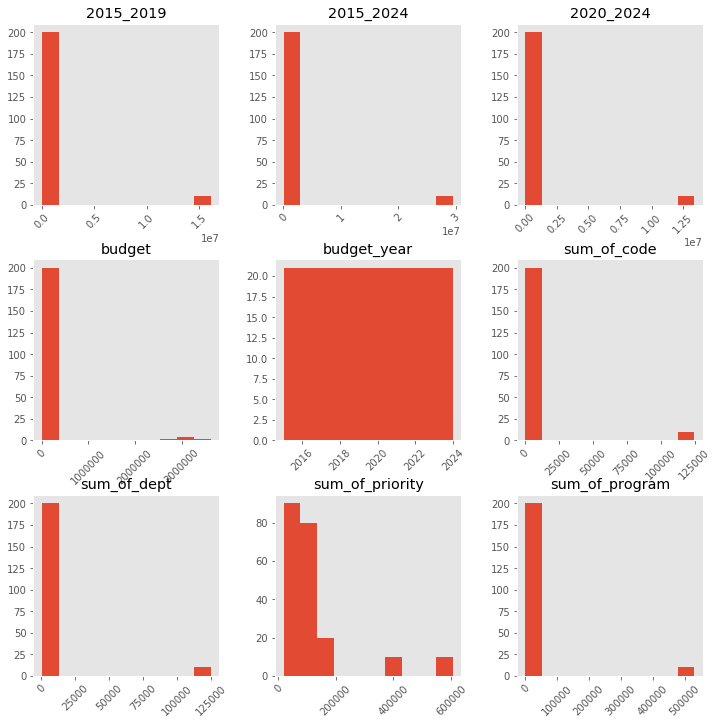

In [45]:
df_melt.hist(grid=False, xrot = 45, figsize=(12,12))
plt.show()

### 5. Write clean data sets to local folder

In [46]:
# Write 'df_new' & 'df_area' & 'df_melt' to a csv file in the same folder
df_new.to_csv(r'df_new.csv',index=None)
df_area.to_csv(r'df_area.csv',index=None)
df_melt.to_csv(r'df_melt.csv',index=None)